In [75]:
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import *
# pyspark.sql.functions - when: 조건문을 작성.
# pyspark.sql.functions - col: 열을 참조.
# pyspark.sql.functions - lit: 리터럴 값(상수값)을 표현.

In [4]:
#SparkSession 생성

ss= SparkSession.builder\
.appName('SparkSQL')\
.getOrCreate()

ss

24/12/11 09:49:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [7]:
user_data = [
    Row(user_id=1, username='A', address='서울'),
    Row(user_id=2, username='B', address='대전'),
    Row(user_id=3, username='C', address='경기도'),
    Row(user_id=4, username='D', address=None),
    Row(user_id=5, username='E', address=None),
    Row(user_id=6, username='F', address='서울'),
    Row(user_id=7, username='G', address='경기도'),
    Row(user_id=8, username='H', address='대구'),
    Row(user_id=9, username='I', address='부산'),
    Row(user_id=10, username='J', address='전주'),
    Row(user_id=11, username='K', address='광주')
]

books_data = [
    Row(book_id=1, title="Book A", author_fname="John", author_lname="Doe", pages=300, released_year=2005, stock_quantity=55),
    Row(book_id=2, title="Book B", author_fname="Jane", author_lname="Smith", pages=250, released_year=2010, stock_quantity=40),
    Row(book_id=3, title="Book C", author_fname="Emily", author_lname="Jones", pages=180, released_year=2015, stock_quantity=20),
    Row(book_id=4, title="Book D", author_fname="Chris", author_lname="Brown", pages=320, released_year=2012, stock_quantity=75),
    Row(book_id=5, title="Book E", author_fname="Anna", author_lname="Davis", pages=270, released_year=2008, stock_quantity=35)
]


In [9]:
user_df = ss.createDataFrame(user_data)
user_df.createOrReplaceTempView('users')

books_df = ss.createDataFrame(books_data)
books_df.createOrReplaceTempView('books')

In [11]:
ss.sql('''
    select * from users
''')\
.show()

+-------+--------+-------+
|user_id|username|address|
+-------+--------+-------+
|      1|       A|   서울|
|      2|       B|   대전|
|      3|       C| 경기도|
|      4|       D|   null|
|      5|       E|   null|
|      6|       F|   서울|
|      7|       G| 경기도|
|      8|       H|   대구|
|      9|       I|   부산|
|     10|       J|   전주|
|     11|       K|   광주|
+-------+--------+-------+



In [12]:
ss.sql('''
    SELECT
        address
        , address IS NULL as is_null
    from users;
''')\
.show()

+-------+-------+
|address|is_null|
+-------+-------+
|   서울|  false|
|   대전|  false|
| 경기도|  false|
|   null|   true|
|   null|   true|
|   서울|  false|
| 경기도|  false|
|   대구|  false|
|   부산|  false|
|   전주|  false|
|   광주|  false|
+-------+-------+



In [13]:
ss.sql('''
    SELECT
    username
    , IF(address IS NULL, '주소없음', address) as IF_addr
    , Case when address IS NULL THEN '주소없음'
        ELSE address END as CASE_addr
    FROM users;  
''').show()

+--------+--------+---------+
|username| IF_addr|CASE_addr|
+--------+--------+---------+
|       A|    서울|     서울|
|       B|    대전|     대전|
|       C|  경기도|   경기도|
|       D|주소없음| 주소없음|
|       E|주소없음| 주소없음|
|       F|    서울|     서울|
|       G|  경기도|   경기도|
|       H|    대구|     대구|
|       I|    부산|     부산|
|       J|    전주|     전주|
|       K|    광주|     광주|
+--------+--------+---------+



<div style = "text-align : center;, font-size : 20px;">두 문장의 차이점

| **특징**         | **[A] IF 구문**                             | **[B] CASE 구문**                          |
|------------------|-------------------------------------------|-------------------------------------------|
| **구조**         | `IF(condition, true_value, false_value)`  | `CASE WHEN condition THEN value ELSE value END` |
| **지원 여부**    | 일부 DBMS(MySQL 등)                        | 모든 주요 DBMS(PostgreSQL, SQL Server 등) 지원 |
| **복잡한 조건**  | 복잡한 조건 처리 불가능                   | 복잡한 조건 처리 가능                     |
| **가독성**       | 간단하고 짧은 조건에 적합                  | 여러 조건을 명확히 표현 가능              |
| **표준 여부**    | SQL 표준 아님                              | SQL 표준                                  |


In [15]:
ss.sql('''
    SELECT
        address
        , IF(address IN('경기도', '서울'), '수도권', '지방') as region
    FROM users
''').show()

+-------+------+
|address|region|
+-------+------+
|   서울|수도권|
|   대전|  지방|
| 경기도|수도권|
|   null|  지방|
|   null|  지방|
|   서울|수도권|
| 경기도|수도권|
|   대구|  지방|
|   부산|  지방|
|   전주|  지방|
|   광주|  지방|
+-------+------+



In [29]:
#stock_quantity >= 50, '재고 많음'
#stock_quantity >= 30, '중간'
#stock_quantity < 30, '재고 없음'

ss.sql('''
    SELECT book_id
        , title
        , author_fname
        , IF (stock_quantity >= 50, '재고 많음'
            , IF ( stock_quantity >=30, '재고 중간'
            , IF ( stock_quantity < 30, '재고 없음','??'))) as IF_quantity_level
            
        , CASE WHEN stock_quantity >= 50 Then '재고 많음'
            WHEN stock_quantity >= 30 Then '재고 중간'
            WHEN stock_quantity < 30 Then '재고 없음'
             Else '?' END as CASE_quantity_level
        
     FROM books

''').show()



+-------+------+------------+-----------------+-------------------+
|book_id| title|author_fname|IF_quantity_level|CASE_quantity_level|
+-------+------+------------+-----------------+-------------------+
|      1|Book A|        John|        재고 많음|          재고 많음|
|      2|Book B|        Jane|        재고 중간|          재고 중간|
|      3|Book C|       Emily|        재고 없음|          재고 없음|
|      4|Book D|       Chris|        재고 많음|          재고 많음|
|      5|Book E|        Anna|        재고 중간|          재고 중간|
+-------+------+------------+-----------------+-------------------+



In [32]:
# 실행 계획 확인하기
print('IF문 실행계획')
print('***********')
ss.sql('''
    SELECT book_id
        , title
        , author_fname
        , IF (stock_quantity >= 50, '재고 많음'
            , IF ( stock_quantity >=30, '재고 중간'
            , IF ( stock_quantity < 30, '재고 없음','??'))) as IF_quantity_level
     FROM books

''').explain()

print('CASE문 실행계획')
print('***********')
ss.sql('''
    SELECT book_id
        , title
        , author_fname
        , CASE WHEN stock_quantity >= 50 Then '재고 많음'
            WHEN stock_quantity >= 30 Then '재고 중간'
            WHEN stock_quantity < 30 Then '재고 없음'
             Else '?' END as CASE_quantity_level
        
     FROM books

''').explain()


print('DISTINCT 실행계획')
print('***********')
ss.sql('''
    SELECT
        DISTINCT author_lname
    FROM books
''').explain()

IF문 실행계획
***********
== Physical Plan ==
*(1) Project [book_id#6L, title#7, author_fname#8, if ((stock_quantity#12L >= 50)) 재고 많음 else if ((stock_quantity#12L >= 30)) 재고 중간 else if ((stock_quantity#12L < 30)) 재고 없음 else ?? AS IF_quantity_level#249]
+- *(1) Scan ExistingRDD[book_id#6L,title#7,author_fname#8,author_lname#9,pages#10L,released_year#11L,stock_quantity#12L]


CASE문 실행계획
***********
== Physical Plan ==
*(1) Project [book_id#6L, title#7, author_fname#8, CASE WHEN (stock_quantity#12L >= 50) THEN 재고 많음 WHEN (stock_quantity#12L >= 30) THEN 재고 중간 WHEN (stock_quantity#12L < 30) THEN 재고 없음 ELSE ? END AS CASE_quantity_level#254]
+- *(1) Scan ExistingRDD[book_id#6L,title#7,author_fname#8,author_lname#9,pages#10L,released_year#11L,stock_quantity#12L]


DISTINCT 실행계획
***********
== Physical Plan ==
*(2) HashAggregate(keys=[author_lname#9], functions=[])
+- Exchange hashpartitioning(author_lname#9, 200), ENSURE_REQUIREMENTS, [id=#183]
   +- *(1) HashAggregate(keys=[author_lname#9], funct

In [34]:
print('DISTINCT DAG 보기')
print('***********')
ss.sql('''
    SELECT
        DISTINCT author_lname
    FROM books
''').show()

DISTINCT DAG 보기
***********
+------------+
|author_lname|
+------------+
|       Jones|
|       Davis|
|       Smith|
|         Doe|
|       Brown|
+------------+



In [36]:
print('COUNT 실행 계획 보기')
print('***********')
ss.sql('''
SELECT
    author_lname
    , count(*)

FROM books
GROUP BY author_lname
''').explain()

COUNT 실행 계획 보기
***********
== Physical Plan ==
*(2) HashAggregate(keys=[author_lname#9], functions=[count(1)])
+- Exchange hashpartitioning(author_lname#9, 200), ENSURE_REQUIREMENTS, [id=#277]
   +- *(1) HashAggregate(keys=[author_lname#9], functions=[partial_count(1)])
      +- *(1) Project [author_lname#9]
         +- *(1) Scan ExistingRDD[book_id#6L,title#7,author_fname#8,author_lname#9,pages#10L,released_year#11L,stock_quantity#12L]




In [35]:
print('COUNT DAG 보기')
print('***********')
ss.sql('''
SELECT
    author_lname
    , count(*)

FROM books
GROUP BY author_lname
''').show()

+------------+--------+
|author_lname|count(1)|
+------------+--------+
|       Jones|       1|
|       Davis|       1|
|       Smith|       1|
|         Doe|       1|
|       Brown|       1|
+------------+--------+



## 성능 비교 요약

| **쿼리 유형**        | **Physical Plan 주요 작업**     | **성능 분석**                                                                                 |
|---------------------|---------------------------|---------------------------------------------------------------------------------------------|
| **GROUP BY + COUNT**| `HashAggregate`          | 효율적으로 집계 수행. 대규모 데이터에 적합하며, Spark의 기본 집계 방식으로 성능 최적.                                      |
| **DISTINCT**        | `HashAggregate`          | 중복 제거를 위해 해시 테이블 사용. 고유 값 수가 많을 경우 성능 저하 가능성 있음.                                                   |
| **IF / CASE**       | `Project`                | 동일한 실행 계획. 조건문 작성 방식의 차이만 있음. 성능은 동일하며, 유지보수 측면에서 `CASE`가 더 적합.                                |

---

## 성능적으로 더 나은 선택

1. **GROUP BY + COUNT** vs **DISTINCT**:
   - **GROUP BY + COUNT**는 집계 연산을 포함하여 더 많은 계산을 수행.
   - **DISTINCT**는 단순히 중복 제거만 수행하므로 더 가볍고 빠를 가능성이 높음. 단, 고유 값이 많을 경우 성능 저하 가능.

2. **IF** vs **CASE**:
   - 실행 계획이 동일하므로 성능 차이는 없음.
   - **CASE**는 가독성이 더 좋고 유지보수성이 뛰어나므로 권장.

---

## 결론
- **DISTINCT**는 중복 제거만 수행하므로 **GROUP BY + COUNT**보다 계산이 가볍지만, 데이터 특성(고유 값 수)에 따라 성능 차이가 날 수 있음.
- **CASE**는 조건문 작성에서 가독성과 유지보수 측면에서 유리하므로 추천됨.
- Spark SQL의 실행 계획(`explain`)을 확인하며 연산 단계를 최적화하면 성능을 더욱 향상시킬 수 있음.


## 데이터 변경

In [50]:
# books 테이블 데이터에 borrowed_by 추가
books_data_with_user = [
    Row(book_id=1, title="Book A", author_fname="John", author_lname="Doe", pages=300, released_year=2005, stock_quantity=55, borrowed_by=1),
    Row(book_id=2, title="Book B", author_fname="Jane", author_lname="Smith", pages=250, released_year=2010, stock_quantity=40, borrowed_by=2),
    Row(book_id=3, title="Book C", author_fname="Emily", author_lname="Jones", pages=180, released_year=2015, stock_quantity=20, borrowed_by=3),
    Row(book_id=4, title="Book D", author_fname="Chris", author_lname="Brown", pages=320, released_year=2012, stock_quantity=75, borrowed_by=None),
    Row(book_id=5, title="Book E", author_fname="Anna", author_lname="Davis", pages=270, released_year=2008, stock_quantity=35, borrowed_by=6)
]


In [55]:
books_df = ss.createDataFrame(books_data_with_user)
books_df.createOrReplaceTempView('books')

In [39]:
# PySparkSQL에서 DDL 바로 수정은 안됨
# ss.sql('''
#     ALTER TABLE books
#     ADD COLUMN borrowed_by INT,
#     ADD CONSTRAINT fk_borrowed_by FOREIGN KEY (borrowed_by) REFERENCES users(user_id)
# ''')

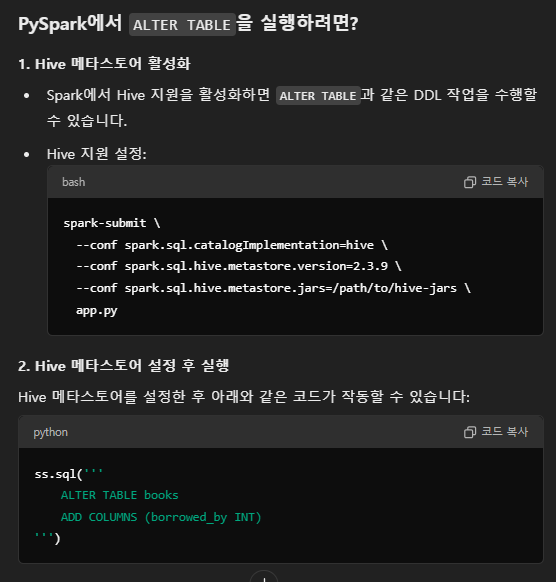

In [60]:
## Spark SQL에서 UPDATE를 지원하지 않음
# ss.sql('''
#     UPDATE books set borrowed_by = CASE
#         WHEN book_id = 1 THEN 1
#         WHEN book_id = 2 THEN 2
#         WHEN book_id = 3 THEN 3
#         WHEN book_id = 4 THEN NULL
#         WHEN book_id = 5 THEN 6
#         ELSE borrowed_by
#     END;
# ''')

# 데이터프레임에서 값 수정
updated_df = books_df.withColumn(
    "borrowed_by",
    when(col("book_id") == 1, 1)
    .when(col("book_id") == 2, 2)
    .when(col("book_id") == 3, 3)
    .when(col("book_id") == 4, lit(None))
    .when(col("book_id") == 5, 6)
    .otherwise(col("borrowed_by")),
)

In [63]:
ss.sql('''
    SELECT *
    FROM books
''').show()

+-------+------+------------+------------+-----+-------------+--------------+-----------+
|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|
+-------+------+------------+------------+-----+-------------+--------------+-----------+
|      1|Book A|        John|         Doe|  300|         2005|            55|          1|
|      2|Book B|        Jane|       Smith|  250|         2010|            40|          2|
|      3|Book C|       Emily|       Jones|  180|         2015|            20|          3|
|      4|Book D|       Chris|       Brown|  320|         2012|            75|       null|
|      5|Book E|        Anna|       Davis|  270|         2008|            35|          6|
+-------+------+------------+------------+-----+-------------+--------------+-----------+



In [73]:
# books_id = 3, stock_quantity = 50으로 바꾼다.
updated_books_df = books_df.withColumn(
    'stock_quantity',
    when( col('book_id') == 3, 50)
    .otherwise(col('stock_quantity')),
)

In [74]:
updated_books_df.show()

+-------+------+------------+------------+-----+-------------+--------------+-----------+
|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|
+-------+------+------------+------------+-----+-------------+--------------+-----------+
|      1|Book A|        John|         Doe|  300|         2005|            55|          1|
|      2|Book B|        Jane|       Smith|  250|         2010|            40|          2|
|      3|Book C|       Emily|       Jones|  180|         2015|            50|          3|
|      4|Book D|       Chris|       Brown|  320|         2012|            75|       null|
|      5|Book E|        Anna|       Davis|  270|         2008|            35|          6|
+-------+------+------------+------------+-----+-------------+--------------+-----------+



In [88]:
# stock_quantity * 10% 증가

updated_df2 = books_df.withColumn(
    'stock_quantity',
        col('stock_quantity') * 0.1
)

updated_df2.createOrReplaceTempView('updated_books')

ss.sql('''
    select * from updated_books
''').show()

+-------+------+------------+------------+-----+-------------+--------------+-----------+
|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|
+-------+------+------------+------------+-----+-------------+--------------+-----------+
|      1|Book A|        John|         Doe|  300|         2005|           5.5|          1|
|      2|Book B|        Jane|       Smith|  250|         2010|           4.0|          2|
|      3|Book C|       Emily|       Jones|  180|         2015|           2.0|          3|
|      4|Book D|       Chris|       Brown|  320|         2012|           7.5|       null|
|      5|Book E|        Anna|       Davis|  270|         2008|           3.5|          6|
+-------+------+------------+------------+-----+-------------+--------------+-----------+



### 데이터 저장
write의 저장 mode : overwrite, append, ignore, error

```
df.write.csv('data/output/sqltest_updated_books.csv', header = True, mode = 'overwrite')
```

파일명과 같은 폴더가 생기면서, 파티션이 나뉜 만큼 파일이 쪼개져서 저장됨

In [91]:
updated_df2.write.csv('data/output/sqltest_updated_books.csv', header = True, mode = 'overwrite')
user_df.write.csv('data/output/sqltest_updated_users.csv', header = True, mode = 'overwrite')

In [104]:
### 파티션 확인
print(updated_df2.rdd.glom().take(100))
print('***********************************')
print(updated_df2.rdd.getNumPartitions())
print('***********************************')
print(updated_df2.explain(True))

[[Row(book_id=1, title='Book A', author_fname='John', author_lname='Doe', pages=300, released_year=2005, stock_quantity=5.5, borrowed_by=1), Row(book_id=2, title='Book B', author_fname='Jane', author_lname='Smith', pages=250, released_year=2010, stock_quantity=4.0, borrowed_by=2)], [Row(book_id=3, title='Book C', author_fname='Emily', author_lname='Jones', pages=180, released_year=2015, stock_quantity=2.0, borrowed_by=3), Row(book_id=4, title='Book D', author_fname='Chris', author_lname='Brown', pages=320, released_year=2012, stock_quantity=7.5, borrowed_by=None), Row(book_id=5, title='Book E', author_fname='Anna', author_lname='Davis', pages=270, released_year=2008, stock_quantity=3.5, borrowed_by=6)]]
***********************************
2
***********************************
== Parsed Logical Plan ==
'Project [book_id#340L, title#341, author_fname#342, author_lname#343, pages#344L, released_year#345L, ('stock_quantity * 0.1) AS stock_quantity#701, borrowed_by#347L]
+- LogicalRDD [book

In [ ]:
updated_df2.write.csv('data/output/sqltest_updated_books.csv', header = True, mode = 'overwrite')
user_df.write.csv('data/output/sqltest_updated_users.csv', header = True, mode = 'overwrite')

In [111]:
df1 = ss.read.csv('data/output/sqltest_updated_books.csv', header = True)
df2 = ss.read.csv('data/output/sqltest_updated_users.csv', header = True)

df1.show(), df2.show()

+-------+------+------------+------------+-----+-------------+--------------+-----------+
|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|
+-------+------+------------+------------+-----+-------------+--------------+-----------+
|      3|Book C|       Emily|       Jones|  180|         2015|           2.0|          3|
|      4|Book D|       Chris|       Brown|  320|         2012|           7.5|       null|
|      5|Book E|        Anna|       Davis|  270|         2008|           3.5|          6|
|      1|Book A|        John|         Doe|  300|         2005|           5.5|          1|
|      2|Book B|        Jane|       Smith|  250|         2010|           4.0|          2|
+-------+------+------------+------------+-----+-------------+--------------+-----------+

+-------+--------+-------+
|user_id|username|address|
+-------+--------+-------+
|      6|       F|   서울|
|      7|       G| 경기도|
|      8|       H|   대구|
|      9|       I|   부산|
|     10|

(None, None)

### 조인 실습
book_id, title, author_fname, author_lname, username, address

In [112]:
ss.sql('''
    SELECT
    	A.book_id
    	, A.title
    	, A.author_fname
    	, A.author_lname
    	, B.username
    	, B.address
    FROM books as A
    INNER JOIN users as B
    ON A.borrowed_by = B.user_id;

''').show()

+-------+------+------------+------------+--------+-------+
|book_id| title|author_fname|author_lname|username|address|
+-------+------+------------+------------+--------+-------+
|      5|Book E|        Anna|       Davis|       F|   서울|
|      1|Book A|        John|         Doe|       A|   서울|
|      3|Book C|       Emily|       Jones|       C| 경기도|
|      2|Book B|        Jane|       Smith|       B|   대전|
+-------+------+------------+------------+--------+-------+



In [113]:
# books LEFT JOIN users
ss.sql('''
    SELECT
    	A.book_id
    	, A.title
    	, A.author_fname
    	, A.author_lname
    	, B.username
    	, B.address
    FROM books as A
    LEFT JOIN users as B
    ON A.borrowed_by = B.user_id;
''').show()

+-------+------+------------+------------+--------+-------+
|book_id| title|author_fname|author_lname|username|address|
+-------+------+------------+------------+--------+-------+
|      4|Book D|       Chris|       Brown|    null|   null|
|      5|Book E|        Anna|       Davis|       F|   서울|
|      1|Book A|        John|         Doe|       A|   서울|
|      3|Book C|       Emily|       Jones|       C| 경기도|
|      2|Book B|        Jane|       Smith|       B|   대전|
+-------+------+------------+------------+--------+-------+



In [116]:
# users LEFT JOIN boos
ss.sql('''
    SELECT
    	
        B.username
    	, B.address
        , A.book_id
    	, A.title
    	, A.author_fname
    	, A.author_lname
    	
    FROM users as B
    LEFT JOIN books as A
    ON A.borrowed_by = B.user_id;
''').show()

+--------+-------+-------+------+------------+------------+
|username|address|book_id| title|author_fname|author_lname|
+--------+-------+-------+------+------------+------------+
|       G| 경기도|   null|  null|        null|        null|
|       F|   서울|      5|Book E|        Anna|       Davis|
|       I|   부산|   null|  null|        null|        null|
|       E|   null|   null|  null|        null|        null|
|       A|   서울|      1|Book A|        John|         Doe|
|       J|   전주|   null|  null|        null|        null|
|       C| 경기도|      3|Book C|       Emily|       Jones|
|       H|   대구|   null|  null|        null|        null|
|       K|   광주|   null|  null|        null|        null|
|       B|   대전|      2|Book B|        Jane|       Smith|
|       D|   null|   null|  null|        null|        null|
+--------+-------+-------+------+------------+------------+



In [120]:
# 사용자 별로 책 대여 목록 > 전체 사용자가 나옴 대여한 정보가 있으면 나옴, 없으면 NULL
ss.sql('''
    SELECT
        B.user_id
        , B.username
        , A.* 
    
    FROM books as A
    RIGHT JOIN users as B
    on A.borrowed_by = B.user_id;
''').show()


+-------+--------+-------+------+------------+------------+-----+-------------+--------------+-----------+
|user_id|username|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|
+-------+--------+-------+------+------------+------------+-----+-------------+--------------+-----------+
|      7|       G|   null|  null|        null|        null| null|         null|          null|       null|
|      6|       F|      5|Book E|        Anna|       Davis|  270|         2008|            35|          6|
|      9|       I|   null|  null|        null|        null| null|         null|          null|       null|
|      5|       E|   null|  null|        null|        null| null|         null|          null|       null|
|      1|       A|      1|Book A|        John|         Doe|  300|         2005|            55|          1|
|     10|       J|   null|  null|        null|        null| null|         null|          null|       null|
|      3|       C|      3|Book C|    

In [134]:
# 특정 지역 서울에 거주하는 사용자가 대여한 책 모록
ss.sql('''
    SELECT
    A.username
    , A.user_id
    , B.*

    FROM users as A
    
    INNER JOIN books as B
    on A.user_id = B.borrowed_by
    where A.address = '서울';
'''   
).show()

+--------+-------+-------+------+------------+------------+-----+-------------+--------------+-----------+
|username|user_id|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|
+--------+-------+-------+------+------------+------------+-----+-------------+--------------+-----------+
|       F|      6|      5|Book E|        Anna|       Davis|  270|         2008|            35|          6|
|       A|      1|      1|Book A|        John|         Doe|  300|         2005|            55|          1|
+--------+-------+-------+------+------------+------------+-----+-------------+--------------+-----------+



In [145]:
# 사용자별로 대여한 책의 수

ss.sql('''
    SELECT
    
        A.user_id as UserID
        , MAX(A.username) as UserName
        , COUNT(B.book_id) as cnt_books
    
    FROM users as A
    
    LEFT JOIN books as B   
    on A.user_id = B.borrowed_by

    GROUP BY A.user_id

    ORDER BY A.user_id

''').show()

+------+--------+---------+
|UserID|UserName|cnt_books|
+------+--------+---------+
|     1|       A|        1|
|     2|       B|        1|
|     3|       C|        1|
|     4|       D|        0|
|     5|       E|        0|
|     6|       F|        1|
|     7|       G|        0|
|     8|       H|        0|
|     9|       I|        0|
|    10|       J|        0|
|    11|       K|        0|
+------+--------+---------+



In [147]:
# 컬럼 추가 pages가 300이상이면 LONG
ss.sql('''
    SELECT
        *
        , CASE WHEN pages >=300 THEN 'LONG'
        		WHEN pages < 300 THEN 'SHORT'
            	ElSE '' END as book_size
    FROM books;
''').show()

+-------+------+------------+------------+-----+-------------+--------------+-----------+---------+
|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|book_size|
+-------+------+------------+------------+-----+-------------+--------------+-----------+---------+
|      1|Book A|        John|         Doe|  300|         2005|            55|          1|     LONG|
|      2|Book B|        Jane|       Smith|  250|         2010|            40|          2|    SHORT|
|      3|Book C|       Emily|       Jones|  180|         2015|            20|          3|    SHORT|
|      4|Book D|       Chris|       Brown|  320|         2012|            75|       null|     LONG|
|      5|Book E|        Anna|       Davis|  270|         2008|            35|          6|    SHORT|
+-------+------+------------+------------+-----+-------------+--------------+-----------+---------+



In [152]:
# 컬럼 추가 stock_quantity > 50 이상 '충분', 30 이상 '보통', '부족'
ss.sql('''
    SELECT
    
        *
        , CASE WHEN stock_quantity >= 50 THEN '충분'
                WHEN stock_quantity >= 30 THEN '보통'
                ELSE '부족' END AS stock_status
    
    FROM books;

''').show()


+-------+------+------------+------------+-----+-------------+--------------+-----------+------------+
|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|stock_status|
+-------+------+------------+------------+-----+-------------+--------------+-----------+------------+
|      1|Book A|        John|         Doe|  300|         2005|            55|          1|        충분|
|      2|Book B|        Jane|       Smith|  250|         2010|            40|          2|        보통|
|      3|Book C|       Emily|       Jones|  180|         2015|            20|          3|        부족|
|      4|Book D|       Chris|       Brown|  320|         2012|            75|       null|        충분|
|      5|Book E|        Anna|       Davis|  270|         2008|            35|          6|        보통|
+-------+------+------------+------------+-----+-------------+--------------+-----------+------------+



In [154]:
# 책 제목에 특정 키워드가 포함되어있는지 확인
ss.sql('''
    SELECT
        *
    FROM books
    
    WHERE title LIKE '%A%'

''').show()


+-------+------+------------+------------+-----+-------------+--------------+-----------+
|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|
+-------+------+------------+------------+-----+-------------+--------------+-----------+
|      1|Book A|        John|         Doe|  300|         2005|            55|          1|
+-------+------+------------+------------+-----+-------------+--------------+-----------+



In [200]:
# 가장 많이 대여된 책의 작가 조회
ss.sql('''
        SELECT

            author_fname
            , COUNT(book_id) as cnt_book

            FROM books GROUP BY author_fname
            ORDER BY author_fname
            LIMIT 1;
''').show()

# 가장 많이 대여된 책의 작가 조회
ss.sql('''
        SELECT MIN(A.stock_quantity)
        FROM (
            SELECT
                book_id
                , MIN(stock_quantity) as stock_quantity
            FROM books
            GROUP BY book_id
            --having stock_quantity = min(stock_quantity)
            ) as A
                 
''').show()

# 가장 많이 대여된 책의 작가 조회
ss.sql('''
        SELECT
            author_fname
            , author_lname
            , count(book_id) as borrow_count
        FROM books
        GROUP BY author_fname, author_lname
        ORDER BY borrow_count DESC
        LIMIT 1;
''').show()

+------------+--------+
|author_fname|cnt_book|
+------------+--------+
|        Anna|       1|
+------------+--------+

+-------------------+
|min(stock_quantity)|
+-------------------+
|                 20|
+-------------------+

+------------+------------+------------+
|author_fname|author_lname|borrow_count|
+------------+------------+------------+
|        Anna|       Davis|           1|
+------------+------------+------------+



In [211]:
# 사용자의 지역별 대여된 책 수 : 사용자 지역별로 대여된 책의 수를 계산합니다.
ss.sql('''
    SELECT
    B.address
    , count(A.book_id)
    FROM books as A
    
    INNER JOIN users as B
    on A.borrowed_by = B.user_ID
    
    GROUP BY B.address
    ORDER BY 2 DESC;
''').show()



+-------+--------------+
|address|count(book_id)|
+-------+--------------+
|   서울|             2|
|   대전|             1|
| 경기도|             1|
+-------+--------------+



In [209]:
ss.sql('''

select * from users
''').show()

+-------+--------+-------+
|user_id|username|address|
+-------+--------+-------+
|      1|       A|   서울|
|      2|       B|   대전|
|      3|       C| 경기도|
|      4|       D|   null|
|      5|       E|   null|
|      6|       F|   서울|
|      7|       G| 경기도|
|      8|       H|   대구|
|      9|       I|   부산|
|     10|       J|   전주|
|     11|       K|   광주|
+-------+--------+-------+



In [216]:
# 대여되지 않은 책 중에서, 가장 페이지 수가 많은 책
#대여되지 않은 책 중에서 페이지 수가 가장 많은 책을 조회합니다.

ss.sql('''
    SELECT
    
        *

    FROM books
    
    WHERE borrowed_by IS NULL
    
    ORDER BY pages DESC
    
    LIMIT 1    
''').show()


+-------+------+------------+------------+-----+-------------+--------------+-----------+
|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|
+-------+------+------------+------------+-----+-------------+--------------+-----------+
|      4|Book D|       Chris|       Brown|  320|         2012|            75|       null|
+-------+------+------------+------------+-----+-------------+--------------+-----------+



In [228]:
# csv로 save
# 사용자의 지역별 대여된 책 수 : 사용자 지역별로 대여된 책의 수를 계산합니다.
df1 = ss.sql('''
    SELECT
        B.address
        , count(A.book_id)
    FROM books as A
    
    INNER JOIN users as B
    on A.borrowed_by = B.user_ID
    
    GROUP BY B.address
    ORDER BY 2 DESC;
''')
df1.write.csv('data/output/result/result1.csv', header = True)

In [219]:
# 대여되지 않은 책 중에서, 가장 페이지 수가 많은 책
#대여되지 않은 책 중에서 페이지 수가 가장 많은 책을 조회합니다.
df2 = ss.sql('''
    SELECT
    
        *

    FROM books
    
    WHERE borrowed_by IS NULL
    
    ORDER BY pages DESC
    
    LIMIT 1    
''')
df2.write.csv('data/output/result/result2.csv', header = True)


In [225]:
ss.read.csv('data/output/result/result1.csv', header = True).show()

+-------+--------------+
|address|count(book_id)|
+-------+--------------+
|   대전|             1|
| 경기도|             1|
|   서울|             2|
+-------+--------------+



In [226]:
ss.read.csv('data/output/result/result2.csv', header = True).show()

+-------+------+------------+------------+-----+-------------+--------------+-----------+
|book_id| title|author_fname|author_lname|pages|released_year|stock_quantity|borrowed_by|
+-------+------+------------+------------+-----+-------------+--------------+-----------+
|      4|Book D|       Chris|       Brown|  320|         2012|            75|       null|
+-------+------+------------+------------+-----+-------------+--------------+-----------+



In [229]:
# 실행계획, DAG 형태 분석
ss.sql('''
    SELECT
        B.address
        , count(A.book_id)
    FROM books as A
    
    INNER JOIN users as B
    on A.borrowed_by = B.user_ID
    
    GROUP BY B.address
    ORDER BY 2 DESC;
''').explain()

== Physical Plan ==
*(7) Sort [count(book_id)#3257L DESC NULLS LAST], true, 0
+- Exchange rangepartitioning(count(book_id)#3257L DESC NULLS LAST, 200), ENSURE_REQUIREMENTS, [id=#3937]
   +- *(6) HashAggregate(keys=[address#2], functions=[count(book_id#340L)])
      +- Exchange hashpartitioning(address#2, 200), ENSURE_REQUIREMENTS, [id=#3933]
         +- *(5) HashAggregate(keys=[address#2], functions=[partial_count(book_id#340L)])
            +- *(5) Project [book_id#340L, address#2]
               +- *(5) SortMergeJoin [borrowed_by#347L], [user_ID#0L], Inner
                  :- *(2) Sort [borrowed_by#347L ASC NULLS FIRST], false, 0
                  :  +- Exchange hashpartitioning(borrowed_by#347L, 200), ENSURE_REQUIREMENTS, [id=#3918]
                  :     +- *(1) Project [book_id#340L, borrowed_by#347L]
                  :        +- *(1) Filter isnotnull(borrowed_by#347L)
                  :           +- *(1) Scan ExistingRDD[book_id#340L,title#341,author_fname#342,author_lname#34

In [221]:
ss.sql('''
    SELECT
    
        *

    FROM books
    
    WHERE borrowed_by IS NULL
    
    ORDER BY pages DESC
    
    LIMIT 1    
''').explain()

== Physical Plan ==
TakeOrderedAndProject(limit=1, orderBy=[pages#344L DESC NULLS LAST], output=[book_id#340L,title#341,author_fname#342,author_lname#343,pages#344L,released_year#345L,stock_quantity#346L,borrowed_by#347L])
+- *(1) Filter isnull(borrowed_by#347L)
   +- *(1) Scan ExistingRDD[book_id#340L,title#341,author_fname#342,author_lname#343,pages#344L,released_year#345L,stock_quantity#346L,borrowed_by#347L]


